## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [ ]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [12]:
# Read your api key environment variable
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=os.getenv('NEWS_API'))
print(newsapi)

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [13]:
# Fetch the Bitcoin news articles
def get_sentiment_scores(text, date, source, url):
    sentiment_scores = {}

    # Sentiment scoring with VADER
    text_sentiment = analyzer.polarity_scores(text)
    sentiment_scores["date"] = date
    sentiment_scores["text"] = text
    sentiment_scores["source"] = source
    sentiment_scores["url"] = url
    sentiment_scores["compound"] = text_sentiment["compound"]
    sentiment_scores["positive"] = text_sentiment["pos"]
    sentiment_scores["neutral"] = text_sentiment["neu"]
    sentiment_scores["negative"] = text_sentiment["neg"]
    if text_sentiment["compound"] >= 0.05:  # Positive
        sentiment_scores["normalized"] = 1
    elif text_sentiment["compound"] <= -0.05:  # Negative
        sentiment_scores["normalized"] = -1
    else:
        sentiment_scores["normalized"] = 0  # Neutral

    return sentiment_scores

In [22]:
def get_sentiments_on_topic(topic):
    """ We loke documentation"""
    sentiments_data = []

    # Loop through all the news articles
    for article in newsapi.get_everything(q=topic, language="en", page_size=100)["articles"]:
        try:
            # Get sentiment scoring using the get_sentiment_score() function
            sentiments_data.append(
                get_sentiment_scores(
                    article["content"],
                    article["publishedAt"][:10],
                    article["source"]["name"],
                    article["url"],
                )
            )

        except AttributeError:
            pass

    return sentiments_data

In [23]:
def sentiment_to_df(sentiments):
    
    # Create a DataFrame with the news articles' data and their sentiment scoring results
    news_df = pd.DataFrame(sentiments)

    # Sort the DataFrame rows by date
    news_df = news_df.sort_values(by="date")

    # Define the date column as the DataFrame's index
    news_df.set_index("date", inplace=True)
    return news_df

# Use the functions


In [24]:
topics = ['Bitcoin', 'Ethereum']

btc_sentiment = get_sentiments_on_topic(topics[0])
bitcoin_df = sentiment_to_df(btc_sentiment)
display(bitcoin_df.head())
# Describe the Bitcoin Sentiment
display("bitcoin_df.describe()")
display(bitcoin_df.describe())

,text,source,url,compound,positive,neutral,negative,normalized
date,,,,,,,,
2022-01-21,A representation of virtual currency Bitcoin i...,Reuters,https://www.reuters.com/technology/bitcoin-fal...,0.0000,0.000,1.000,0.000,0
2022-01-21,"NEW YORK, Jan 21 (Reuters) - Speculators' net ...",Reuters,https://www.reuters.com/markets/currencies/us-...,-0.3818,0.000,0.927,0.073,-1
2022-01-21,New York City Mayor Eric Adams confirmed his f...,Time,https://time.com/6140923/new-york-city-mayor-a...,0.0000,0.000,1.000,0.000,0
2022-01-21,El Salvador's government plans to offer small ...,Business Insider,https://markets.businessinsider.com/news/curre...,0.0000,0.000,1.000,0.000,0
2022-01-21,"Back in September\r\n, Robinhood announced pla...",Engadget,https://www.engadget.com/robinhood-cryptocurre...,0.0772,0.038,0.962,0.000,1


'bitcoin_df.describe()'

,compound,positive,neutral,negative,normalized
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.039651,0.065430,0.878670,0.055880,0.160000
std,0.455870,0.059428,0.088807,0.076112,0.895781
min,-0.895700,0.000000,0.662000,0.000000,-1.000000
25%,-0.296000,0.000000,0.823750,0.000000,-1.000000
50%,0.000000,0.061500,0.882000,0.000000,0.000000
75%,0.426225,0.112000,0.940250,0.090250,1.000000
max,0.834100,0.234000,1.000000,0.269000,1.000000


In [25]:
eth_sentiment = get_sentiments_on_topic(topics[1])
ethereum_df = sentiment_to_df(eth_sentiment)
display(ethereum_df.head())
display("ethereum_df.describe()")
display(ethereum_df.describe())

,text,source,url,compound,positive,neutral,negative,normalized
date,,,,,,,,
2022-01-21,"Back in September\r\n, Robinhood announced pla...",Engadget,https://www.engadget.com/robinhood-cryptocurre...,0.0772,0.038,0.962,0.00,1
2022-01-21,"Cryptocurrency prices tumbled overnight, with ...",MarketWatch,https://www.marketwatch.com/story/bitcoin-drop...,-0.3818,0.000,0.920,0.08,-1
2022-01-21,A representation of virtual currency Bitcoin i...,Reuters,https://www.reuters.com/technology/bitcoin-fal...,0.0000,0.000,1.000,0.00,0
2022-01-21,New York City Mayor Eric Adams confirmed his f...,Time,https://time.com/6140923/new-york-city-mayor-a...,0.0000,0.000,1.000,0.00,0
2022-01-22,One of the biggest and best decisions my husba...,Business Insider,https://www.businessinsider.com/personal-finan...,0.6369,0.102,0.898,0.00,1


'ethereum_df.describe()'

,compound,positive,neutral,negative,normalized
count,100.000000,100.000000,100.00000,100.00000,100.000000
mean,0.229487,0.083190,0.89040,0.02643,0.450000
std,0.362598,0.070917,0.08316,0.04608,0.783349
min,-0.718400,0.000000,0.62700,0.00000,-1.000000
25%,0.000000,0.000000,0.84200,0.00000,0.000000
50%,0.238150,0.073000,0.88950,0.00000,1.000000
75%,0.510600,0.126250,0.95400,0.04975,1.000000
max,0.918600,0.277000,1.00000,0.25100,1.000000


In [ ]:
### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: ethereum

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [32]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Expand the default stopwords list if necessary
nltk.download('wordnet')

In [35]:
# Complete the tokenizer function
def tokenizer(text):
    """returns a list of words that is lemmatized, stopworded, tokenized, and free of any non-letter characters. """
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]

In [36]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,text,source,url,compound,positive,neutral,negative,normalized,tokens
date,,,,,,,,,
2022-01-21,A representation of virtual currency Bitcoin i...,Reuters,https://www.reuters.com/technology/bitcoin-fal...,0.0000,0.000,1.000,0.000,0,"[representation, virtual, currency, bitcoin, s..."
2022-01-21,"NEW YORK, Jan 21 (Reuters) - Speculators' net ...",Reuters,https://www.reuters.com/markets/currencies/us-...,-0.3818,0.000,0.927,0.073,-1,"[new, york, jan, reuters, speculator, net, lon..."
2022-01-21,New York City Mayor Eric Adams confirmed his f...,Time,https://time.com/6140923/new-york-city-mayor-a...,0.0000,0.000,1.000,0.000,0,"[new, york, city, mayor, eric, adam, confirmed..."
2022-01-21,El Salvador's government plans to offer small ...,Business Insider,https://markets.businessinsider.com/news/curre...,0.0000,0.000,1.000,0.000,0,"[el, salvador, government, plan, offer, small,..."
2022-01-21,"Back in September\r\n, Robinhood announced pla...",Engadget,https://www.engadget.com/robinhood-cryptocurre...,0.0772,0.038,0.962,0.000,1,"[back, september, robinhood, announced, plan, ..."


In [37]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,text,source,url,compound,positive,neutral,negative,normalized,tokens
date,,,,,,,,,
2022-01-21,"Back in September\r\n, Robinhood announced pla...",Engadget,https://www.engadget.com/robinhood-cryptocurre...,0.0772,0.038,0.962,0.00,1,"[back, september, robinhood, announced, plan, ..."
2022-01-21,"Cryptocurrency prices tumbled overnight, with ...",MarketWatch,https://www.marketwatch.com/story/bitcoin-drop...,-0.3818,0.000,0.920,0.08,-1,"[cryptocurrency, price, tumbled, overnight, bi..."
2022-01-21,A representation of virtual currency Bitcoin i...,Reuters,https://www.reuters.com/technology/bitcoin-fal...,0.0000,0.000,1.000,0.00,0,"[representation, virtual, currency, bitcoin, s..."
2022-01-21,New York City Mayor Eric Adams confirmed his f...,Time,https://time.com/6140923/new-york-city-mayor-a...,0.0000,0.000,1.000,0.00,0,"[new, york, city, mayor, eric, adam, confirmed..."
2022-01-22,One of the biggest and best decisions my husba...,Business Insider,https://www.businessinsider.com/personal-finan...,0.6369,0.102,0.898,0.00,1,"[one, biggest, best, decision, husband, made, ..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [39]:
from collections import Counter
from nltk import ngrams

In [42]:
# Generate the Bitcoin N-grams where N=2
flat_bitcoin_df_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_bitcoin_df_tokens, n=2))
bigram_counts.most_common(20)

[(('feb', 'reuters'), 14),
 (('el', 'salvador'), 11),
 (('reuters', 'bitcoin'), 10),
 (('char', 'bitcoin'), 9),
 (('jan', 'reuters'), 8),
 (('char', 'new'), 7),
 (('new', 'york'), 7),
 (('char', 'feb'), 6),
 (('international', 'monetary'), 5),
 (('monetary', 'fund'), 5),
 (('justice', 'department'), 5),
 (('lowest', 'level'), 4),
 (('six', 'month'), 4),
 (('fear', 'russian'), 4),
 (('york', 'jan'), 3),
 (('u', 'dollar'), 3),
 (('reuters', 'u'), 3),
 (('digital', 'asset'), 3),
 (('record', 'high'), 3),
 (('level', 'six'), 3)]

In [43]:
# Generate the Ethereum N-grams where N=2
flat_ethereum_df_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(flat_ethereum_df_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('feb', 'reuters'), 7),
 (('nonfungible', 'token'), 6),
 (('char', 'feb'), 6),
 (('cb', 'insight'), 6),
 (('insight', 'newsletter'), 6),
 (('newsletter', 'subscriber'), 6),
 (('subscriber', 'get'), 6),
 (('get', 'free'), 6),
 (('free', 'newsletter'), 6),
 (('newsletter', 'stay'), 6),
 (('stay', 'step'), 6),
 (('step', 'ahead'), 6),
 (('ahead', 'technology'), 6),
 (('technology', 'trend'), 6),
 (('trend', 'venture'), 6),
 (('venture', 'capital'), 6),
 (('capital', 'startup'), 6),
 (('startup', 'industry'), 6),
 (('industry', 'tomorrow'), 6),
 (('digital', 'asset'), 5)]

In [44]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin
token_count(flat_btc_tokens)

[('char', 99),
 ('bitcoin', 65),
 ('reuters', 30),
 ('cryptocurrency', 23),
 ('u', 19),
 ('new', 15),
 ('crypto', 15),
 ('feb', 15),
 ('el', 12),
 ('salvador', 12)]

In [47]:
# Use token_count to get the top 10 words for Ethereum
token_count(flat_ethereum_df_tokens)

[('char', 93),
 ('cryptocurrency', 24),
 ('bitcoin', 20),
 ('ethereum', 16),
 ('newsletter', 16),
 ('crypto', 13),
 ('digital', 13),
 ('new', 12),
 ('million', 11),
 ('token', 11)]

# Words Clouds

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

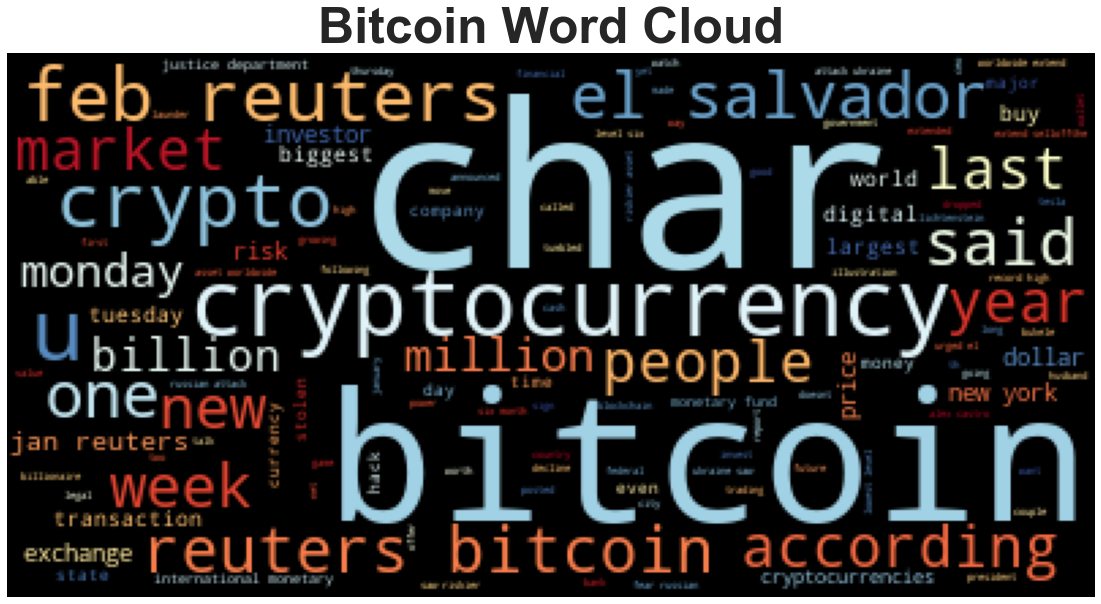

In [49]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

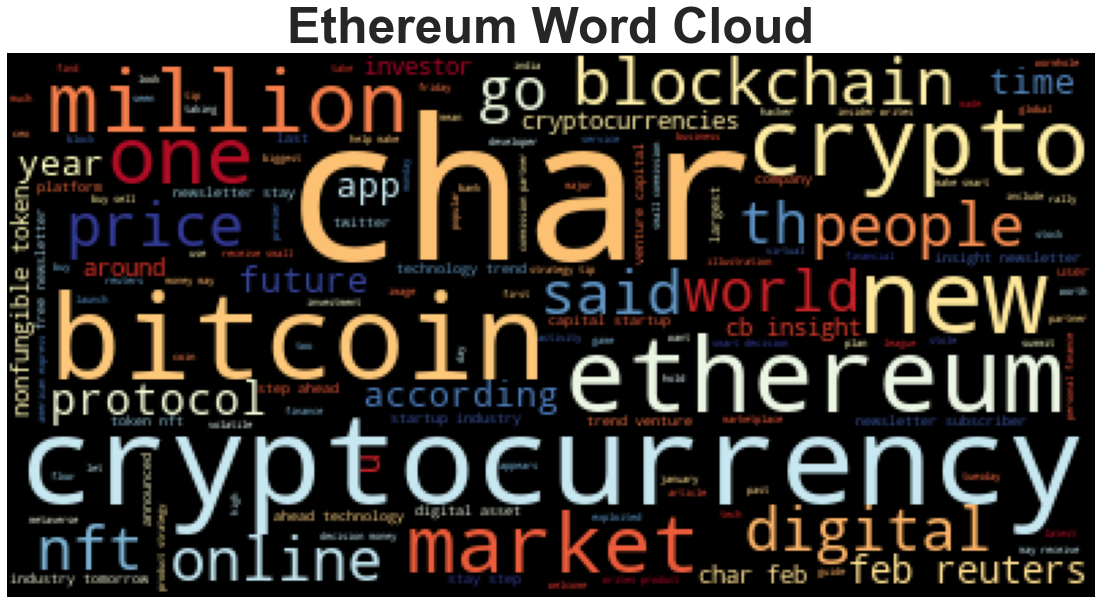

In [62]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_ethereum_df_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [63]:
import spacy
from spacy import displacy

In [53]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

#### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
flat_btc_text_str = " ".join(bitcoin_df.text.to_list())
print(flat_btc_text_str)

A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken January 8, 2021. REUTERS/Dado Ruvic/File PhotoJan 21 (Reuters) - Bitcoin dropped 9.28% to $36… [+508 chars] NEW YORK, Jan 21 (Reuters) - Speculators' net long positioning on the U.S. dollar dropped in the latest week to its lowest level since mid-September 2021, according to calculations by Reuters and U.S… [+3071 chars] New York City Mayor Eric Adams confirmed his first paycheck—which arrives on Friday—will be converted into Bitcoin and Ethereum.
Coinbase Global Inc., the largest U.S. cryptocurrency exchange, will … [+1880 chars] El Salvador's government plans to offer small and medium-sized companies $10 million in cryptocurrency loans this quarter, according to CoinDesk. 
The country will partner with solana-based lending … [+1543 chars] Back in September
, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the b

In [56]:
# Run the NER processor on all of the text
btc_doc = nlp(flat_btc_text_str)
btc_doc.user_data["title"] = "Bitcoin NER"

# Add a title to the document
# YOUR CODE HERE!

In [57]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [58]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Bitcoin PERSON
January 8, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoJan PERSON
21 CARDINAL
Reuters ORG
9.28% PERCENT
36 MONEY
NEW YORK GPE
Jan 21 DATE
Reuters ORG
U.S. GPE
the latest week DATE
mid-September 2021 DATE
Reuters ORG
U.S GPE
New York City GPE
Eric Adams PERSON
first ORDINAL
Friday DATE
Bitcoin and Ethereum ORG
Coinbase Global Inc. ORG
U.S. GPE
El Salvador's GPE
$10 million MONEY
this quarter DATE
CoinDesk ORG
September DATE
Robinhood ORG
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Saturday DATE
more than 50% PERCENT
November DATE
Brazil GPE
AP ORG
April DATE
Rio de Janeiro FAC
two CARDINAL
7 million CARDINAL
almost half CARDINAL
November DATE
Bitcoin PERSON
Fed ORG
NEW YORK GPE
LONDON GPE
Jan 24 DATE
Reuters ORG
the day on DATE
Monday DATE
six months DATE
Russian NORP
January 24, 2022 - DATE
Ponzi ORG
Elon Musk PERSON
mid-May DATE
Recasts NORP
NEW YORK GPE
LONDON GPE
Jan 24 DATE
Reuters ORG
the day on DATE
Monday DATE
LONDON GPE
NEW YORK GPE
Jan 24 

### Ethereum NER

In [60]:
# Concatenate all of the Bitcoin text together
flat_eth_text_str = " ".join(ethereum_df.text.to_list())
#print(flat_eth_text_str)
eth_doc = nlp(flat_eth_text_str)
eth_doc.user_data["title"] = "Ethereum NER"
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(eth_doc,style='ent', options=options)

In [61]:
# Run the NER processor on all of the text
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

# Add a title to the document
# YOUR CODE HERE!

September DATE
Robinhood ORG
overnight TIME
last August DATE
-5.97% PERCENT
more than 6% PERCENT
+358 ORG
Bitcoin PERSON
January 8, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoJan PERSON
21 CARDINAL
Reuters ORG
9.28% PERCENT
36 MONEY
New York City GPE
Eric Adams PERSON
first ORDINAL
Friday DATE
Bitcoin and Ethereum ORG
Coinbase Global Inc. ORG
U.S. GPE
One CARDINAL
last March DATE
one CARDINAL
+3176 CARDINAL
almost half CARDINAL
November DATE
Bitcoin PERSON
Friday DATE
months DATE
35,422 MONEY
Friday DATE
Coinbase PERSON
Saturday DATE
more than 50% PERCENT
November DATE
2022 DATE
Ethereum ORG
second ORDINAL
Bitcoin PERSON
Thousands CARDINAL
every day DATE
Bloomberg ORG
January 2022 DATE
India GPE
one CARDINAL
Fed ORG
weeks DATE
at least one CARDINAL
January 1st DATE
2022 DATE
the past day DATE
10 CARDINAL
the Opening Bell ORG
Insider PERSON
Android ORG
3080 CARDINAL
Alex Kantrowitz PERSON
Amazon ORG
Apple ORG
Micros ORG
the Future of Work Summit ORG
Olga Vorobyeva PERSON
VOX Consulting 